<h1>Лабораторна робота №4 </h1>
<h1>Гаврилюк Р.В</h1>
<h1>БС-82</h1>
<h1>Перевірка даних на нормальність за допомогою критерію Шапіра-Уілка</h1>


<h2>1.Сгенеруйте набір даних, що містить не менше 6 змінних. Частину змінних згенеруйте за нормальний розподілом, частину - за будь-яким іншим розподілом. Кількість спостережень - 20.</h2>






In [25]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.backends.backend_pdf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom




In [26]:
df = pd.DataFrame(
    {
        'Nor1': np.random.normal(loc=15, scale=5, size=20),
        'Nor2': np.random.standard_normal(size=20),
        'Nor3': np.random.randn(20),
        'Log': np.random.logistic(loc=4, scale=8, size=20),
        'Gam': np.random.gamma(shape=1,size=20),
        'Unif': np.random.uniform(size=20),
    }
)
df

,Nor1,Nor2,Nor3,Log,Gam,Unif
0,19.589441,-2.125652,1.648135,4.342821,1.566892,0.850999
1,20.304533,0.937371,-1.698514,-21.843332,0.484766,0.635455
2,5.450774,0.472197,-2.217772,9.872036,0.392630,0.182505
3,9.220347,0.358292,-2.762740,20.860181,3.262753,0.998283
4,16.383518,1.856853,-0.202095,12.646566,2.009662,0.167014
5,21.377423,-1.340905,-0.154888,-6.470905,1.330962,0.616856
6,18.240773,0.856833,-0.843404,25.233147,0.139916,0.319352
7,24.311437,-0.390038,-0.889730,18.634969,0.138585,0.491808
8,14.627394,2.095578,2.151839,10.137932,0.443342,0.175324
9,10.089415,-0.078082,0.071861,4.145861,0.250357,0.203642


<h2>2.   Створіть функцію, що реалізує критерій Шапіро-Уілка та застосуйте її до кожної змінної набору данних.
Детальний опис роботи критерію та приклад його розрахунку (с. 606):
https://pdfs.semanticscholar.org/e4a7/42a4f0585b4e4069726f6628f4d4285a0827.pdf</h2>



In [27]:
df = pd.DataFrame({key: sorted(values) for key, values in df.transpose().iterrows()})
df.head()

,Nor1,Nor2,Nor3,Log,Gam,Unif
0,5.450774,-2.125652,-2.762740,-21.843332,0.055513,0.011990
1,7.395157,-1.340905,-2.217772,-15.207480,0.136636,0.149993
2,8.051223,-1.155505,-1.911346,-9.633675,0.138585,0.167014
3,9.049072,-0.931408,-1.698514,-6.470905,0.139916,0.175324
4,9.220347,-0.827123,-1.382372,-0.546789,0.163376,0.182505


In [28]:
def seredn(massiv,n):
    k=0
    
    for i in range(n):
        k+=massiv[i]
    return k/n

mean_data = {i: seredn(df[i],20) for i in df}

In [29]:
def seredn_kv(massiv,n, mean_):
    p=0
    for i in range(n):
        p+=((massiv[i]-mean_)**2)
    return p
s_sq = {i: seredn_kv(df[i],20,mean_data[i]) for i in df}

In [38]:
arr=[0.4734, 0.3211, 0.2565, 0.2085, 0.1686, 0.1334, 0.1013, 0.0711, 0.0422, 0.0140]

def B(massiv,n):
    m=0
    
    for i in range(n//2):
        m+=(arr[i]*(massiv[(n-1)-i]-massiv[i]))
    return m
    

b = {i: B(df[i],20) for i in df}

In [39]:
def get_W(b_v, s_sqq_):
    return (b_v**2)/s_sqq_

W = {i: get_W(b[i], s_sq[i]) for i in df}

WTheory = sts.shapiro(df['Nor1'])
W, WTheory

({'Nor1': 0.9639109584745803,
  'Nor2': 0.9765186273299333,
  'Nor3': 0.9871624727770999,
  'Log': 0.985875687145387,
  'Gam': 0.7854795587212722,
  'Unif': 0.9268837300525552},
 (0.9639557003974915, 0.6255125403404236))

<h2>3. Сгенеруйте пусту таблицю, в якій кількість рядків - це кількість змінних + 1. Кількість стовбчиків - 3. Назва стовпчиків - Variable, Statistics, Distribution.
Шаблон таблиці:
https://drive.google.com/file/d/1gRNsk9UDhl_6GGkJ04q0cBWBgsJvTgI4/view?usp=sharing</h2>

In [40]:
col = ["Variable", "Statistics", "Distribution"]
data_df = pd.DataFrame(columns = col)

data_df

,Variable,Statistics,Distribution


<h2>4. Занести в стовпчик Variable назви змінних.</h2>

In [41]:
data_df["Variable"] = df.keys()
data_df

,Variable,Statistics,Distribution
0,Nor1,NaN,NaN
1,Nor2,NaN,NaN
2,Nor3,NaN,NaN
3,Log,NaN,NaN
4,Gam,NaN,NaN
5,Unif,NaN,NaN


<h2>5. Занести в стовпчик Distribution результати роботи криетрію Шапіро-Уілка. Для змінних, які розподілені за нормальним законом вносити "normal", в протилежному вигляді - "non-normal".</h2>

In [42]:
def calibration(value,theory):
    if(value <= theory):
        h = 'non-normal'
    if(value >= theory):    
        h = 'normal'
    return h


data_df["Distribution"] = [(calibration(W[i],WTheory[0]))for i in data_df["Variable"]]

data_df

,Variable,Statistics,Distribution
0,Nor1,NaN,non-normal
1,Nor2,NaN,normal
2,Nor3,NaN,normal
3,Log,NaN,normal
4,Gam,NaN,non-normal
5,Unif,NaN,non-normal


<h2>6. Розрахувати для всіх змінних, що розподілені за нормальним законом розрахувати середне значення та стандартне відхилення. Записати в таблицю. Форма запису: Середнє [стандартне відхилення].</h2>



In [43]:
for i in range (data_df.shape[0]):
    var = data_df["Variable"][i]
    
    if 'normal' in var:
        data_df["Statistics"][i] = f'{df[var].mean()} [{df[var].std()}]'

data_df

,Variable,Statistics,Distribution
0,Nor1,NaN,non-normal
1,Nor2,NaN,normal
2,Nor3,NaN,normal
3,Log,NaN,normal
4,Gam,NaN,non-normal
5,Unif,NaN,non-normal


<h2>7. Розрахувати для всіх змінних, що розподілені за розподілом відсутнім від нормального розрахувати медіану та інтерквартильний розмах. Записати в таблицю. Форма запису: Медіана [25%; 75%].</h2>

In [44]:
for i in range (data_df.shape[0]):
    var = data_df["Variable"][i]
    
    if 'normal' not in var:
        data_df["Statistics"][i] = \
        f'{df[var].median()} \
        [{df[var].quantile(0.25)}; {df[var].quantile(0.75)}]'

data_df

,Variable,Statistics,Distribution
0,Nor1,15.43125440733497 [9.872148245109727; ...,non-normal
1,Nor2,-0.1990559543001317 [-0.79309051205335...,normal
2,Nor3,-0.3939490924747327 [-1.28868886179144...,normal
3,Log,5.286005298342593 [-0.1551631361311074...,normal
4,Gam,0.46405396820876293 [0.228612047047811...,non-normal
5,Unif,0.5199960013596516 [0.1983580389442030...,non-normal


<h2>8. Зберегти таблицю в пдф форматі.</h2>

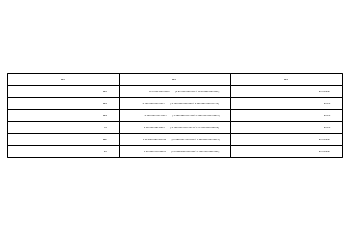

In [45]:
figure = plt.figure()
ax=figure.add_subplot(111)

text = []
for row in range(len(data_df)):
    text.append(data_df.iloc[row])

ax.table(cellText=text, colLabels=df.columns, loc='center')
ax.axis('off')

pdf = matplotlib.backends.backend_pdf.PdfPages("out.pdf")
pdf.savefig(figure)
pdf.close()